# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/AI/1. Machine learning/ML projects/ANN Electrical output prediction/electrical_energy_output.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))
# if classification activation = sigmoid, classification more than 2 softmax, regression no activation function

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19620.2930
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.3302
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.9913
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.3491
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.1336
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.6031
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.1151
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58.8295
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9184
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9076
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.5406
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.1068
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6990
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.7094
Epoch 15/100
240/240 ━━━━━

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[430.7  431.23]
 [461.7  460.01]
 [465.2  461.14]
 ...
 [472.41 473.26]
 [439.27 438.  ]
 [458.44 463.28]]


### Scores & conclusion

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² score: {r2:.2f}")


MSE: 24.98
MAE: 3.95
R² score: 0.91


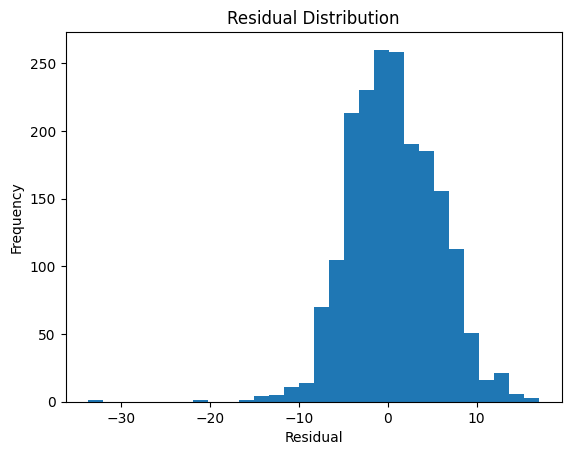

In [ ]:
residuals = y_test - y_pred.flatten()

plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


Centered around 0 → unbiased model

Skewed → systematic error

Wide → model underfitting or noisy data

### Conclusion

The Artificial Neural Network demonstrates strong predictive performance on the test set, achieving an R² score of 0.92, which indicates that the model explains the majority of the variance in electrical energy output. The Mean Squared Error (24.70) and Mean Absolute Error (3.96) further confirm that prediction errors remain limited and acceptable for a regression task of this nature.

Residual analysis shows errors centered around zero with no visible systematic pattern, suggesting that the model does not suffer from bias and that its predictions are well-balanced across the range of outputs. This behavior indicates good generalization and confirms that the model has successfully captured the underlying relationships in the data.

Overall, the results validate the effectiveness of the ANN architecture for this problem, providing both high accuracy and stable error behavior, making it suitable for practical energy output prediction tasks.